Problem Statement

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

Motivation
Hate  speech  is  an  unfortunately  common  occurrence  on  the  Internet.  Often social media sites like Facebook and Twitter face the problem of identifying and censoring  problematic  posts  while weighing the right to freedom of speech. The  importance  of  detecting  and  moderating hate  speech  is  evident  from  the  strong  connection between hate speech and actual hate crimes. Early identification of users promoting  hate  speech  could  enable  outreach  programs that attempt to prevent an escalation from speech to action. Sites such as Twitter and Facebook have been seeking  to  actively  combat  hate  speech. In spite of these reasons, NLP research on hate speech has been very limited, primarily due to the lack of a general definition of hate speech, an analysis of its demographic influences, and an investigation of the most effective features.

 

In [43]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [44]:
#load files:-
train  = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Twitter-Sentiment-Analysis/master/train_E6oV3lV%20-%20train_E6oV3lV.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Twitter-Sentiment-Analysis/master/test_tweets_anuFYb8%20-%20test_tweets_anuFYb8.csv')
sample_sub=pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Twitter-Sentiment-Analysis/master/sample_submission_gfvA5FD%20-%20sample_submission_gfvA5FD.csv')

In [45]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [46]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to se...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [47]:
sample_sub

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,0
17193,49156,0
17194,49157,0
17195,49158,0


In [48]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [49]:
train.shape, test.shape

((31962, 3), (17197, 2))

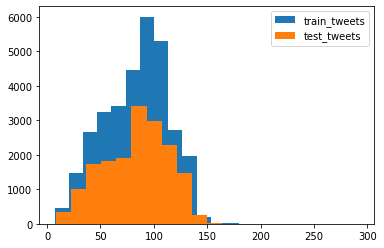

In [50]:
#compare tweets in train and test file
length_train=train['tweet'].str.len()
length_test=test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [51]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [52]:
label = train.groupby('label')['label'].sum()
label/len(train)*100

label
0    0.00000
1    7.01458
Name: label, dtype: float64

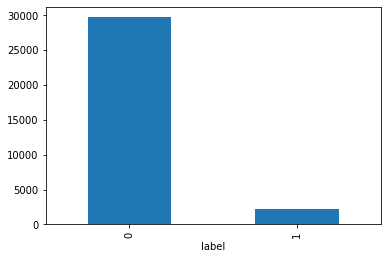

In [53]:
train.groupby('label').tweet.count().plot.bar(ylim=0)
plt.show()

Preprocessing raw text and getting it ready for machine learning

In [54]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = stopwords.words("english")

train['processed_tweet'] = train['tweet'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

test['processed_tweet'] = test['tweet'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
#make all words lower case
train['processed_tweet'] = train['processed_tweet'].str.lower()
test['processed_tweet'] = test['processed_tweet'].str.lower()

# remove user from tweet because it is anonymised
train['processed_tweet'] = train['processed_tweet'].str.replace("user", " ")
test['processed_tweet'] = test['processed_tweet'].str.replace("user", " ")

# remove hash tags
train['processed_tweet'] = train['processed_tweet'].str.replace("#", " ")
test['processed_tweet'] = test['processed_tweet'].str.replace("#", " ")

#remove words less than 3 characters
train['processed_tweet'] = train['processed_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
test['processed_tweet'] = test['processed_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [56]:
train

,id,label,tweet,processed_tweet
0,1,0,@user when a father is dysfunctional and is so...,father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use caus offer wheelchair va...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love take time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,31959,0,to see nina turner on the airwaves trying to w...,see nina turner airwav tri wrap mantl genuin h...
31959,31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh templ vandalis calgari wso condemn act


In [57]:
test

,id,tweet,processed_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolif aislif requir passion dedic willpow ...
1,31964,@user #white #supremacists want everyone to se...,white supremacist want everyon see new bird movi
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acn altwaystoh healthi heal
3,31966,is the hp and the cursed child book up for res...,hp curs child book reserv alreadi ye harrypott...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amaz hilari nephew eli ahmir uncl da...
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factori left right polaris trump usele...
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feel like mermaid hairflip neverreadi formal w...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillari campaign today ohio omg amp use word l...
17195,49158,"happy, at work conference: right mindset leads...",happi work confer right mindset lead cultur de...


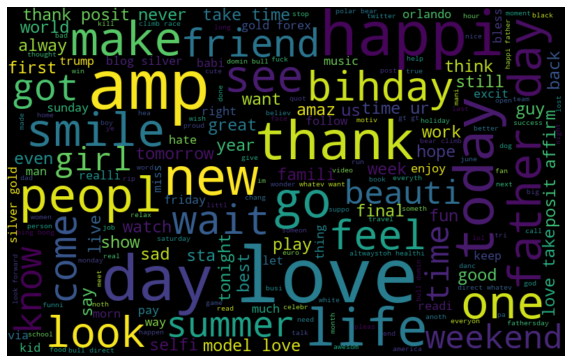

In [58]:
#put all words in a mosiac
all_words = ' '.join([text for text in train['processed_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Creating training and test sets

In [59]:
#define x, y and t_test
y=train.label
X=train['processed_tweet']
X_test=test['processed_tweet']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.10, random_state=42, shuffle=True)

In [61]:
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((28765,), (3197,), (28765,), (3197,))

Converting Text to Word Frequency Vectors with TfidfVectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))
val_tfIdf = vectorizer_tfidf.transform(X_val.values.astype('U'))
X_test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))
print(vectorizer_tfidf.get_feature_names()[:5])

['aa', 'aaa', 'aaaaa', 'aaaaah', 'aaahh']


In [63]:
train_tfIdf.shape,  val_tfIdf.shape, X_test_tfIdf.shape

((28765, 29081), (3197, 29081), (17197, 29081))

Define and train the model

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

model=MLPClassifier(early_stopping=True)
model.fit(train_tfIdf, y_train)
#create hyper parameters
penalty=['l1', 'l2']
C=np.logspace(0,4,10)
hyperparameters=dict()   #penalty=penalty, C=C)
#create grid search
clf=GridSearchCV(model, hyperparameters, cv=5, verbose=0)
#fit the model
best_model=clf.fit(train_tfIdf, y_train) # training the model

In [68]:
#score
print(clf.score(train_tfIdf, y_train))

0.9469841821658265


In [69]:
best_model.predict(val_tfIdf)
best_model

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
y_pred=best_model
y_pred = model.predict_proba(val_tfIdf)
y_pred = y_pred >= 0.3
y_pred=y_pred.astype(int)

In [71]:
prediction = model.predict_proba(val_tfIdf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int = prediction_int.astype(np.int)

In [75]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':prediction_int})
df

,Actual,Predicted
12412,0,0
9311,0,0
12109,0,1
28746,0,0
7657,0,0
...,...,...
16716,0,0
22886,0,0
3299,0,0
17598,0,0


In [77]:
test_pred = clf.predict_proba(X_test_tfIdf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission.csv', index=False) # writing data to a CSV file
submission

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
